In [10]:
import pandas as pd
import datetime

In [2]:
list_dict = [
    {
        "id": 1,
        "sourceAccount": "company_x",
        "targetAccount": "my_account",
        "amount": 10000,
        "category": "salary",
        "time": "2018-02-25T08:00:10.002Z",
  },
  {

        "id": 2,
        "sourceAccount": "company_x",
        "targetAccount": "my_account",
        "amount": -5000,
        "category": "salary",
        "time": "2018-02-25T09:00:30.000Z",
  },
    {
        "id": 3,
        "sourceAccount": "company_x",
        "targetAccount": "my_account",
        "amount": 10000,
        "category": "other",
        "time": "2018-02-25T10:02:00.030Z",
  },
  {
        "id": 4,
        "sourceAccount": "company_x",
        "targetAccount": "my_account",
        "amount": 3000,
        "category": "salary",
        "time": "2018-02-26T08:00:00.000Z",
  },

]

In [37]:
df = pd.DataFrame(list_dict).set_index('id')
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [21]:
df

,sourceAccount,targetAccount,amount,category,time
id,,,,,
1,company_x,my_account,10000,salary,2018-02-25 08:00:10.002000+00:00
2,company_x,my_account,-5000,salary,2018-02-25 09:00:30+00:00
3,company_x,my_account,10000,other,2018-02-25 10:02:00.030000+00:00
4,company_x,my_account,3000,salary,2018-02-26 08:00:00+00:00


In [27]:
start_time = datetime.datetime.strptime("2018-02-25T01:00:20.050Z", '%Y-%m-%dT%H:%M:%S.%fZ')
end_time = datetime.datetime.strptime("2018-02-26T01:00:20.050Z", '%Y-%m-%dT%H:%M:%S.%fZ')

In [26]:
start_time

datetime.datetime(2018, 2, 26, 8, 1, 20, 50000)

In [31]:
df.dtypes

sourceAccount            object
targetAccount            object
amount                    int64
category                 object
time             datetime64[ns]
dtype: object

In [33]:
filtered_df = df[(df['category'] == 'salary') & (df['time'] >= start_time) & (df['time'] <= end_time)]

In [34]:
filtered_df['amount'].sum()

5000

In [142]:
l = [[1,2,3], [[4,5], 6, [7,8]]]

In [189]:
l = []
l.append([1,2])
l

[[1, 2]]

In [190]:
from datetime import datetime as dt

def group_into_dict(transactions):
    transaction_groups = {}

    for transaction in transactions:
        key = '{source_account}-{target_account}:{amount};{category}'.format(
            source_account=transaction['sourceAccount'],
            target_account=transaction['targetAccount'],
            amount=str(transaction['amount']),
            category=transaction['category'])
        
        transaction_groups.setdefault(key, []).append(transaction)
    
    return transaction_groups

def find_duplicate_transactions(*transactions: dict):
    TIME_FORMAT = '%Y-%m-%dT%H:%M:%S.%fZ'
    #sorted_transactions = sorted(transactions, key=lambda transaction: dt.strptime(transaction['time'], TIME_FORMAT))    
    transaction_groups = group_into_dict(transactions)
    
    output_lists = []

    for key in transaction_groups.keys():
        if len(transaction_groups[key]) > 1:

            potential_duplicate_list = sorted(transaction_groups[key], key=lambda transaction: dt.strptime(transaction['time'], TIME_FORMAT))
            output_list = []
            for i in range(len(potential_duplicate_list) - 1):
                transaction_1 = potential_duplicate_list[i]
                transaction_2 = potential_duplicate_list[i+1]
                print('i: {}, T1: {}, T2: {}'.format(i, transaction_1, transaction_2))
                if (dt.strptime(transaction_2['time'], TIME_FORMAT) - (dt.strptime(transaction_1['time'], TIME_FORMAT))).total_seconds() <= 60:
                    print('Passed check...')
                    print('T1: {}, T2: {}'.format(transaction_1, transaction_2))
                    output_list.extend([transaction_1, transaction_2]) if len(output_list) == 0 else output_list.append(transaction_2)
                else:
                    if len(output_list) > 1:
                        print('Appending..')
                        print(output_list)
                        output_lists.append(output_list)
                        output_list = []
            if len(output_list) > 1:
                print('Final Append..')
                print(output_list)
                output_lists.append(output_list)

    # for transaction in sorted_transactions:
    #     key = '{source_account}-{target_account}:{amount};{category}'.format(
    #         source_account=transaction['sourceAccount'],
    #         target_account=transaction['targetAccount'],
    #         amount=str(transaction['amount']),
    #         category=transaction['category'])
    #     transaction_list = transaction_groups.get(key, [])
    #     if len(transaction_list) > 0:
    #         #print(transaction_list)
    #         if (dt.strptime(transaction['time'], TIME_FORMAT) - (dt.strptime(transaction_list[-1][-1]['time'], TIME_FORMAT))).total_seconds() <= 60:
    #             transaction_list[-1].append(transaction)
    #         else:
    #             #output_lists.append(transaction_list)
    #             transaction_list.append([transaction])
    #     else:
    #         transaction_groups[key] = [[transaction]]
    
    # for key in transaction_groups:
    #     output_lists+=transaction_groups[key]


    

    return sorted(output_lists, key=lambda transaction_list: (dt.strptime(transaction_list[0]['time'], TIME_FORMAT)))

In [133]:
l = []
l.append([0,1,2])
l.append([3,4,5])
l

[[0, 1, 2], [3, 4, 5]]

In [193]:
data = ({
        "id": 1,
        "sourceAccount": "company_x",
        "targetAccount": "my_account",
        "amount": 10000,
        "category": "salary",
        "time": "2018-02-25T08:00:00.000Z",
    },
    {
        "id": 2,
        "sourceAccount": "company_x",
        "targetAccount": "my_account",
        "amount": 10000,
        "category": "salary",
        "time": "2018-02-25T08:01:00.000Z",
    },
    {
        "id": 3,
        "sourceAccount": "company_x",
        "targetAccount": "my_account",
        "amount": 10000,
        "category": "salary",
        "time": "2018-02-25T08:03:00.000Z",
    },
    {
        "id": 4,
        "sourceAccount": "company_y",
        "targetAccount": "my_account",
        "amount": 10000,
        "category": "salary",
        "time": "2017-02-25T08:00:00.000Z",
    },
    {
        "id": 5,
        "sourceAccount": "company_y",
        "targetAccount": "my_account",
        "amount": 10000,
        "category": "salary",
        "time": "2017-02-25T08:00:00.000Z",
    },
    {
        "id": 6,
        "sourceAccount": "company_z",
        "targetAccount": "my_account",
        "amount": 10000,
        "category": "salary",
        "time": "2019-02-25T08:00:00.000Z",
    }

)
find_duplicate_transactions(*data)

[]

In [181]:
data = ({'id': 41, 'sourceAccount': 'my_account', 'targetAccount': 'supermarket', 'amount': -850, 'category': 'groceries', 'time': '2018-05-20T18:51:31.000Z'}, 
 {'id': 24, 'sourceAccount': 'my_account', 'targetAccount': 'fitness_club', 'amount': -610, 'category': 'other', 'time': '2018-04-22T11:54:10.000Z'}, 
 {'id': 3, 'sourceAccount': 'my_account', 'targetAccount': 'supermarket', 'amount': -1000, 'category': 'groceries', 'time': '2018-03-01T17:28:32.000Z'}, 
 {'id': 101, 'sourceAccount': 'company_x', 'targetAccount': 'my_account', 'amount': 240, 'category': 'salary', 'time': '2018-02-25T08:00:30.000Z'}, 
 {'id': 37, 'sourceAccount': 'my_account', 'targetAccount': 'supermarket', 'amount': -1690, 'category': 'groceries', 'time': '2018-05-10T18:14:10.000Z'}, 
 {'id': 11, 'sourceAccount': 'my_account', 'targetAccount': 'supermarket', 'amount': -1540, 'category': 'groceries', 'time': '2018-03-05T16:24:31.000Z'}, 
 {'id': 21, 'sourceAccount': 'my_account', 'targetAccount': 'supermarket', 'amount': -1690, 'category': 'groceries', 'time': '2018-04-10T18:14:10.000Z'}, 
 {'id': 10, 'sourceAccount': 'my_account', 'targetAccount': 'fitness_club', 'amount': -560, 'category': 'other', 'time': '2018-03-04T12:54:10.000Z'}, 
 {'id': 5, 'sourceAccount': 'my_account', 'targetAccount': 'coffee_shop', 'amount': -50, 'category': 'eating_out', 'time': '2018-03-02T09:25:20.000Z'}, 
 {'id': 8, 'sourceAccount': 'my_account', 'targetAccount': 'restaurant', 'amount': -670, 'category': 'eating_out', 'time': '2018-03-02T18:54:45.000Z'}, 
 {'id': 19, 'sourceAccount': 'my_account', 'targetAccount': 'coffee_shop', 'amount': -90, 'category': 'eating_out', 'time': '2018-04-07T09:54:21.000Z'}, 
 {'id': 31, 'sourceAccount': 'my_account', 'targetAccount': 'coffee_shop', 'amount': -90, 'category': 'eating_out', 'time': '2018-05-07T09:55:10.000Z'}, 
 {'id': 18, 'sourceAccount': 'my_account', 'targetAccount': 'cinema', 'amount': -580, 'category': 'other', 'time': '2018-04-05T20:01:18.000Z'}, 
 {'id': 36, 'sourceAccount': 'my_account', 'targetAccount': 'internet_shop', 'amount': -1650, 'category': 'other', 'time': '2018-05-08T21:36:41.000Z'}, 
 {'id': 7, 'sourceAccount': 'my_account', 'targetAccount': 'supermarket', 'amount': -160, 'category': 'groceries', 'time': '2018-03-02T13:14:00.000Z'}, 
 {'id': 42, 'sourceAccount': 'my_account', 'targetAccount': 'cinema', 'amount': -450, 'category': 'other', 'time': '2018-05-23T19:13:10.000Z'}, 
 {'id': 6, 'sourceAccount': 'my_account', 'targetAccount': 'internet_shop', 'amount': -250, 'category': 'other', 'time': '2018-03-01T22:16:40.000Z'}, 
 {'id': 20, 'sourceAccount': 'my_account', 'targetAccount': 'internet_shop', 'amount': -1650, 'category': 'other', 'time': '2018-04-08T21:36:41.000Z'}, 
 {'id': 29, 'sourceAccount': 'my_account', 'targetAccount': 'cinema', 'amount': -580, 'category': 'other', 'time': '2018-05-05T20:01:18.000Z'}, 
 {'id': 25, 'sourceAccount': 'my_account', 'targetAccount': 'supermarket', 'amount': -850, 'category': 'groceries', 'time': '2018-04-20T18:51:31.000Z'}, 
 {'id': 201, 'sourceAccount': 'company_x', 'targetAccount': 'my_account', 'amount': 10000, 'category': 'pension_benefits', 'time': '2018-02-25T08:00:00.000Z'}, 
 {'id': 32, 'sourceAccount': 'my_account', 'targetAccount': 'coffee_shop', 'amount': -90, 'category': 'eating_out', 'time': '2018-05-07T09:56:09.000Z'}, 
 {'id': 23, 'sourceAccount': 'my_account', 'targetAccount': 'coffee_shop', 'amount': -70, 'category': 'eating_out', 'time': '2018-04-15T09:12:20.000Z'}, 
 {'id': 17, 'sourceAccount': 'my_account', 'targetAccount': 'supermarket', 'amount': -1870, 'category': 'groceries', 'time': '2018-04-05T10:24:30.000Z'}, 
 {'id': 12, 'sourceAccount': 'my_account', 'targetAccount': 'bowling_place', 'amount': -600, 'category': 'other', 'time': '2018-03-05T21:12:10.000Z'}, 
 {'id': 15, 'sourceAccount': 'my_account', 'targetAccount': 'coffee_shop', 'amount': -50, 'category': 'eating_out', 'time': '2018-04-01T10:25:10.000Z'}, 
 {'id': 1, 'sourceAccount': 'company_x', 'targetAccount': 'my_account', 'amount': 10000, 'category': 'salary', 'time': '2018-02-25T08:00:00.000Z'}, {'id': 2, 'sourceAccount': 'my_account', 'targetAccount': 'coffee_shop', 'amount': -50, 'category': 'eating_out', 'time': '2018-03-01T12:34:00.000Z'}, {'id': 40, 'sourceAccount': 'my_account', 'targetAccount': 'fitness_club', 'amount': -610, 'category': 'other', 'time': '2018-05-22T11:54:10.000Z'}, {'id': 33, 'sourceAccount': 'my_account', 'targetAccount': 'coffee_shop', 'amount': -90, 'category': 'eating_out', 'time': '2018-05-07T09:57:05.000Z'}, {'id': 38, 'sourceAccount': 'my_account', 'targetAccount': 'restaurant', 'amount': -970, 'category': 'eating_out', 'time': '2018-05-17T19:52:46.000Z'}, {'id': 39, 'sourceAccount': 'my_account', 'targetAccount': 'coffee_shop', 'amount': -70, 'category': 'eating_out', 'time': '2018-05-15T09:12:20.000Z'}, {'id': 14, 'sourceAccount': 'my_account', 'targetAccount': 'coffee_shop', 'amount': -50, 'category': 'eating_out', 'time': '2018-04-01T10:24:40.000Z'}, {'id': 9, 'sourceAccount': 'my_account', 'targetAccount': 'coffee_shop', 'amount': -50, 'category': 'eating_out', 'time': '2018-03-04T07:14:20.000Z'}, {'id': 27, 'sourceAccount': 'company_x', 'targetAccount': 'my_account', 'amount': 10000, 'category': 'salary', 'time': '2018-04-25T08:00:00.000Z'}, {'id': 26, 'sourceAccount': 'my_account', 'targetAccount': 'cinema', 'amount': -450, 'category': 'other', 'time': '2018-04-23T19:13:10.000Z'}, {'id': 22, 'sourceAccount': 'my_account', 'targetAccount': 'restaurant', 'amount': -970, 'category': 'eating_out', 'time': '2018-04-17T19:52:46.000Z'}, {'id': 102, 'sourceAccount': 'my_account', 'targetAccount': 'internet_shop', 'amount': -250, 'category': 'other', 'time': '2018-03-01T22:16:50.000Z'}, {'id': 28, 'sourceAccount': 'my_account', 'targetAccount': 'supermarket', 'amount': -1870, 'category': 'groceries', 'time': '2018-05-05T10:24:30.000Z'}, {'id': 16, 'sourceAccount': 'company_x', 'targetAccount': 'my_account', 'amount': 10000, 'category': 'salary', 'time': '2018-03-25T08:10:00.000Z'}, {'id': 30, 'sourceAccount': 'my_account', 'targetAccount': 'coffee_shop', 'amount': -90, 'category': 'eating_out', 'time': '2018-05-07T09:54:21.000Z'}, {'id': 4, 'sourceAccount': 'my_account', 'targetAccount': 'cinema', 'amount': -330, 'category': 'other', 'time': '2018-03-01T20:10:15.000Z'}, {'id': 35, 'sourceAccount': 'my_account', 'targetAccount': 'coffee_shop', 'amount': -90, 'category': 'eating_out', 'time': '2018-05-07T09:58:06.000Z'}, {'id': 13, 'sourceAccount': 'my_account', 'targetAccount': 'coffee_shop', 'amount': -50, 'category': 'eating_out', 'time': '2018-04-01T10:24:00.000Z'})

In [191]:
find_duplicate_transactions(*data)

i: 0, T1: {'id': 25, 'sourceAccount': 'my_account', 'targetAccount': 'supermarket', 'amount': -850, 'category': 'groceries', 'time': '2018-04-20T18:51:31.000Z'}, T2: {'id': 41, 'sourceAccount': 'my_account', 'targetAccount': 'supermarket', 'amount': -850, 'category': 'groceries', 'time': '2018-05-20T18:51:31.000Z'}
i: 0, T1: {'id': 24, 'sourceAccount': 'my_account', 'targetAccount': 'fitness_club', 'amount': -610, 'category': 'other', 'time': '2018-04-22T11:54:10.000Z'}, T2: {'id': 40, 'sourceAccount': 'my_account', 'targetAccount': 'fitness_club', 'amount': -610, 'category': 'other', 'time': '2018-05-22T11:54:10.000Z'}
i: 0, T1: {'id': 21, 'sourceAccount': 'my_account', 'targetAccount': 'supermarket', 'amount': -1690, 'category': 'groceries', 'time': '2018-04-10T18:14:10.000Z'}, T2: {'id': 37, 'sourceAccount': 'my_account', 'targetAccount': 'supermarket', 'amount': -1690, 'category': 'groceries', 'time': '2018-05-10T18:14:10.000Z'}
i: 0, T1: {'id': 2, 'sourceAccount': 'my_account', 't

[[{'id': 6,
   'sourceAccount': 'my_account',
   'targetAccount': 'internet_shop',
   'amount': -250,
   'category': 'other',
   'time': '2018-03-01T22:16:40.000Z'},
  {'id': 102,
   'sourceAccount': 'my_account',
   'targetAccount': 'internet_shop',
   'amount': -250,
   'category': 'other',
   'time': '2018-03-01T22:16:50.000Z'}],
 [{'id': 13,
   'sourceAccount': 'my_account',
   'targetAccount': 'coffee_shop',
   'amount': -50,
   'category': 'eating_out',
   'time': '2018-04-01T10:24:00.000Z'},
  {'id': 14,
   'sourceAccount': 'my_account',
   'targetAccount': 'coffee_shop',
   'amount': -50,
   'category': 'eating_out',
   'time': '2018-04-01T10:24:40.000Z'},
  {'id': 15,
   'sourceAccount': 'my_account',
   'targetAccount': 'coffee_shop',
   'amount': -50,
   'category': 'eating_out',
   'time': '2018-04-01T10:25:10.000Z'}],
 [{'id': 30,
   'sourceAccount': 'my_account',
   'targetAccount': 'coffee_shop',
   'amount': -90,
   'category': 'eating_out',
   'time': '2018-05-07T09:54

In [119]:
find_duplicate_transactions(
    {
        "id": 1,
        "sourceAccount": "company_x",
        "targetAccount": "my_account",
        "amount": 10000,
        "category": "salary",
        "time": "2018-02-25T08:00:00.000Z",
    },
    {
        "id": 2,
        "sourceAccount": "company_x",
        "targetAccount": "my_account",
        "amount": 10000,
        "category": "salary",
        "time": "2018-02-25T08:01:00.000Z",
    },
    {
        "id": 3,
        "sourceAccount": "company_x",
        "targetAccount": "my_account",
        "amount": 10000,
        "category": "salary",
        "time": "2018-02-25T08:03:00.000Z",
    },
    {
        "id": 4,
        "sourceAccount": "company_y",
        "targetAccount": "my_account",
        "amount": 10000,
        "category": "salary",
        "time": "2017-02-25T08:00:00.000Z",
    },
    {
        "id": 5,
        "sourceAccount": "company_y",
        "targetAccount": "my_account",
        "amount": 10000,
        "category": "salary",
        "time": "2017-02-25T08:00:00.000Z",
    },
    {
        "id": 6,
        "sourceAccount": "company_z",
        "targetAccount": "my_account",
        "amount": 10000,
        "category": "salary",
        "time": "2019-02-25T08:00:00.000Z",
    }
)

[[{'id': 4,
   'sourceAccount': 'company_y',
   'targetAccount': 'my_account',
   'amount': 10000,
   'category': 'salary',
   'time': '2017-02-25T08:00:00.000Z'},
  {'id': 5,
   'sourceAccount': 'company_y',
   'targetAccount': 'my_account',
   'amount': 10000,
   'category': 'salary',
   'time': '2017-02-25T08:00:00.000Z'}],
 [{'id': 1,
   'sourceAccount': 'company_x',
   'targetAccount': 'my_account',
   'amount': 10000,
   'category': 'salary',
   'time': '2018-02-25T08:00:00.000Z'},
  {'id': 2,
   'sourceAccount': 'company_x',
   'targetAccount': 'my_account',
   'amount': 10000,
   'category': 'salary',
   'time': '2018-02-25T08:01:00.000Z'}],
 [{'id': 3,
   'sourceAccount': 'company_x',
   'targetAccount': 'my_account',
   'amount': 10000,
   'category': 'salary',
   'time': '2018-02-25T08:03:00.000Z'}],
 [{'id': 6,
   'sourceAccount': 'company_z',
   'targetAccount': 'my_account',
   'amount': 10000,
   'category': 'salary',
   'time': '2019-02-25T08:00:00.000Z'}]]

In [113]:
l

[[]]

([<matplotlib.axis.XTick at 0x12fdf7610>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25')])

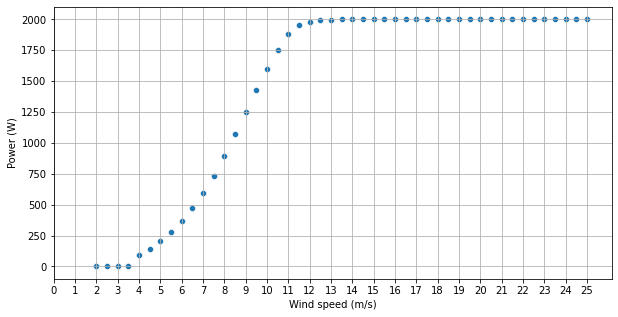

In [20]:
x = [x/2 for x in range(2*2, int(25.5*2))]
y = [0, 0, 0, 0, 89, 142, 204, 279, 368, 470, 594, 736, 896, 1069, 1247, 1428, 1599, 1753, 1881, 1951, 1981, 1994, 1998, 
     2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 
     2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, ]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
ax = sns.scatterplot(x=x, y=y)
plt.grid()
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Power (W)')
plt.xticks(list(range(0, 26)))